In [1]:
import cv2 as cv
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv_imshow
import math
drive.mount('/content/drive')

Mounted at /content/drive


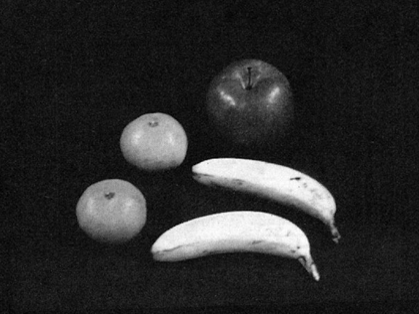

In [2]:
folder = r'/content/drive/MyDrive/images'
path_img = os.path.join(folder,'fruit.bmp')

img = cv.imread(path_img)
if img is None:
  sys.exit("could not read the image.")
cv_imshow(img)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [3]:
def Image_Binary(src,Thresholding=55):
  ret, thresh = cv.threshold(src,Thresholding,255,cv.THRESH_BINARY)
  return thresh


In [4]:
def Image_Labeling(src,src_gray,src_image_binary):
  kernel2 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
  bin_clo = cv.dilate(src_image_binary,kernel2,iterations=2)
  analysis = cv.connectedComponentsWithStats(
    bin_clo,
    connectivity=8,
    ltype=cv.CV_32S
  )
  num_labels,labels,stats,centers = analysis

  src_image_labeling = np.copy(src)
  src_h, src_w = src_image_binary.shape
  src_image_contour = np.zeros((src_h,src_w,1), dtype = np.uint8)
  src_image_segmenation = np.zeros((src_h,src_w,1),dtype = np.uint8)

  for i in range(1,num_labels):
    x,y,w,h,area = stats[i]
    cx,cy = centers[i]
    if (area>100):
      for row in range(src_h):
        for col in range(src_w):
          if (labels[row,col]==i):
            src_image_contour[row,col]=255
      contours, hierarchy = cv.findContours(
          src_image_contour,
          cv.RETR_EXTERNAL,
          cv.CHAIN_APPROX_SIMPLE
      )
      src_image_labeling = cv.drawContours(
        src_image_labeling,
        contours,
        -1,
        (255,0,0),
        1
      )

      cnt = contours[0]
      perimeter = cv.arcLength(cnt,True)

      e = 4 * math.pi*(1/perimeter*perimeter)

      cv.circle(src_image_labeling,(int(cx),int(cy)),2,(0,255,0),2,8,0)
      cv.rectangle(src_image_labeling,(x,y),(x+w,y+h),(0,0,255),1,8,0)
      cv.putText(
        src_image_labeling,
        "No. "+str(i),
        (x,y-10),
        cv.FONT_HERSHEY_SIMPLEX,
        .5,
        (0,0,255),
        1
      )
      print("No. "+str(i)+" 周長: %d, 面積: %d, 圓度: %lf"%(perimeter,area,e))

      if (e<0.5):
        continue
      else:
        for row in range(src_h):
          for col in range(src_w):
            if (labels[row,col]==i):
              src_image_segmenation[row,col]==255
  return src_image_contour, src_image_segmenation,src_image_labeling


No. 1 周長: 288, 面積: 4148, 圓度: 12.566371
No. 2 周長: 224, 面積: 3608, 圓度: 12.566371
No. 7 周長: 420, 面積: 5724, 圓度: 12.566371
No. 8 周長: 242, 面積: 4038, 圓度: 12.566371
No. 9 周長: 445, 面積: 7057, 圓度: 12.566371


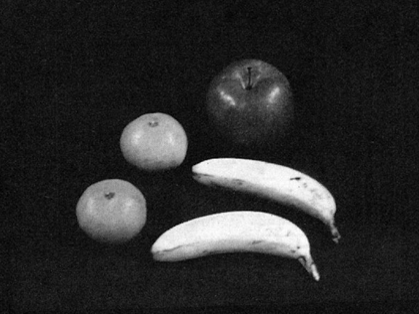

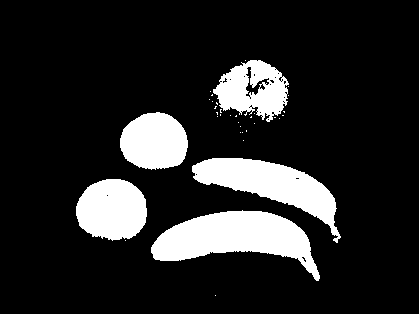

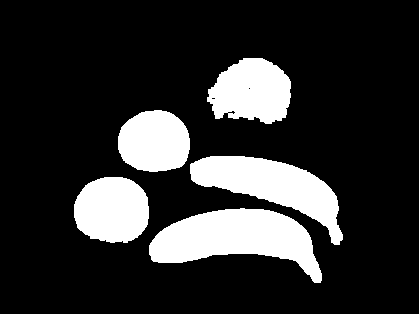

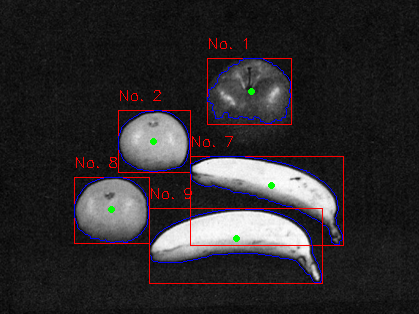

In [5]:
src_image_binary = Image_Binary(img_gray)
src_image_contour, src_image_segmenation,src_image_labeling = Image_Labeling(
  img,
  img_gray,
  src_image_binary
)
cv_imshow(img)
cv_imshow(src_image_binary)
cv_imshow(src_image_contour)
cv_imshow(src_image_labeling)